In [1]:
# import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
# load dataset
from sklearn.datasets import load_iris
df = pd.DataFrame(load_iris().data, columns= load_iris().feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# create model
km = KMeans(n_clusters=3, random_state=42)

# fit model
km.fit(df)

# predict
y_pred = km.predict(df)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [15]:
df['cluster'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [16]:
km.cluster_centers_

array([[ 6.85000000e+00,  3.07368421e+00,  5.74210526e+00,
         2.07105263e+00,  2.00000000e+00],
       [ 5.90161290e+00,  2.74838710e+00,  4.39354839e+00,
         1.43387097e+00, -1.22124533e-15],
       [ 5.00600000e+00,  3.42800000e+00,  1.46200000e+00,
         2.46000000e-01,  1.00000000e+00]])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

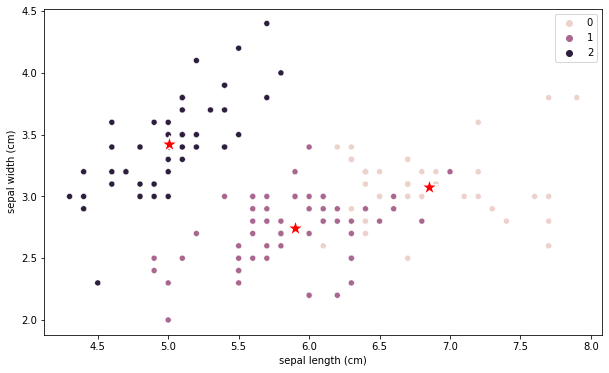

In [42]:
# Assuming kmeans is your fitted KMeans model
centroids = km.cluster_centers_

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')
# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker= '*', s=300, color='red')

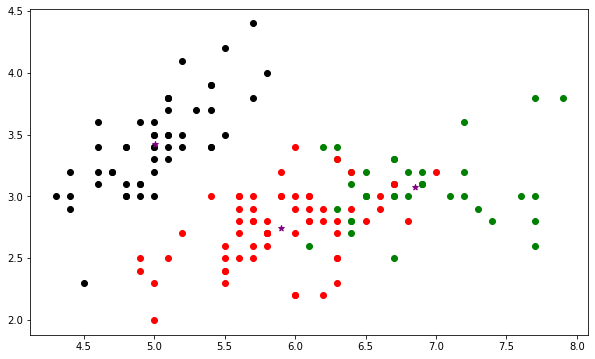

In [26]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.figure(figsize=(10, 6))

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

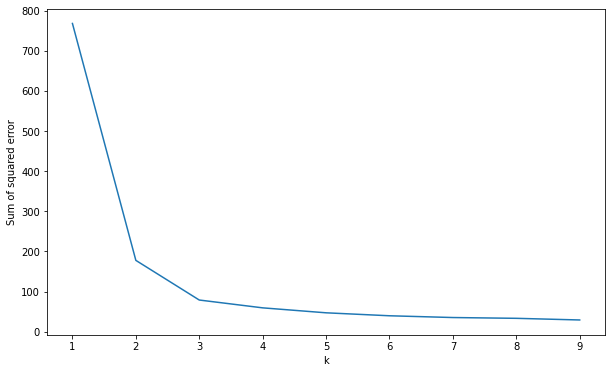

In [44]:
# determine the value of k
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)